## 模型优化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# 重置列名
data = pd.read_excel("Concrete_Data.xls")
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
data = data.rename(columns=mapper)
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 数据标准化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 特征选择

#### 线性回归模型

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [5]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2,f_classif,mutual_info_regression
# 选取最好的6个特征
x_new = SelectKBest(f_classif, k = 6).fit(X_train, y_train).get_support(indices = True)
print(x_new)

[0 1 2 5 6 7]


In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train2 = X_train[:,[0, 1, 2 ,4 ,5 ,6]]
X_test2 = X_test[:,[0, 1, 2 ,4 ,5 ,6]]

lr2 = LinearRegression()
lr2.fit(X_train2, y_train)
y_pred_lr2 = lr2.predict(X_test2)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("""LinearRegression \t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test,
        y_pred_lr),
        mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr))) 
print("""LinearRegression2 \t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr2)),mean_squared_error(y_test,
        y_pred_lr2),
        mean_absolute_error(y_test, y_pred_lr2), r2_score(y_test, y_pred_lr2))) 

Model			 RMSE 	 MSE 	 MAE 	 R2
LinearRegression 	 10.65 	 113.44 8.40 	0.592864
LinearRegression2 	 12.72 	 161.85 10.19 	0.419123


#### 决策树类模型

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

# Adaboost回归
Ada = AdaBoostRegressor(n_estimators=100)#这里使用100个决策树
# 决策树回归
dtr = DecisionTreeRegressor()
# 随机森林回归
rfr = RandomForestRegressor(n_estimators=100)
# GBRT回归
GBRT = GradientBoostingRegressor(n_estimators=100)
# ExtraTree极端随机树回归
ETR = ExtraTreeRegressor()
    
# 模型训练
Ada.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
GBRT.fit(X_train, y_train)
ETR.fit(X_train, y_train)

y_pred_Ada = Ada.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_GBRT = GBRT.predict(X_test)
y_pred_ETR = ETR.predict(X_test)

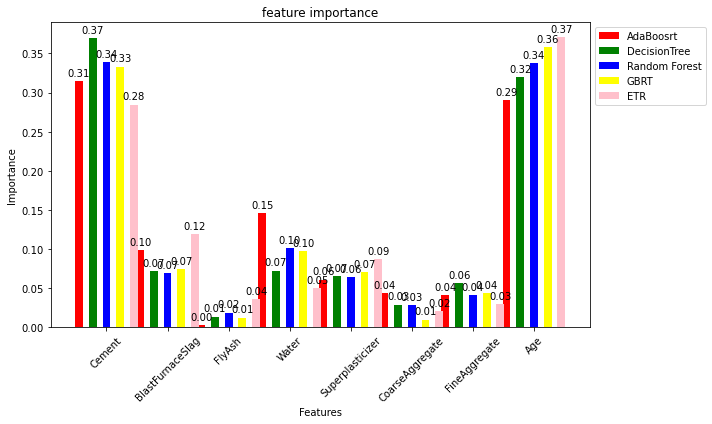

In [9]:
feature_Ada = Ada.feature_importances_
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
feature_GBRT = GBRT.feature_importances_
feature_ETR = ETR.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels))
width = 0.9

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_Ada, width/7, label='AdaBoosrt',color="r")
rects2 = ax.bar(x-(width/4), feature_dtr, width/7, label='DecisionTree',color="g")
rects3 = ax.bar(x, feature_rfr, width/7, label='Random Forest',color="b")
rects4 = ax.bar(x+(width/4), feature_GBRT, width/7, label='GBRT',color="yellow")
rects5 = ax.bar(x+(width/2), feature_ETR, width/7, label='ETR',color="pink")

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('feature importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.show()

In [10]:
# 根据RandomForest的重要性排序
rfr.feature_importances_

array([0.33886933, 0.06967667, 0.01897941, 0.10127638, 0.06388369,
       0.02886745, 0.04088745, 0.33755963])

In [12]:
X_train_sel = X_train[:,[0,1,3,4,5,6,7]]
X_test_sel = X_test[:,[0,1,3,4,5,6,7]]

rfr_sel = RandomForestRegressor()
rfr_sel.fit(X_train_sel, y_train)

y_pred_rfr_sel = rfr_sel.predict(X_test_sel)

print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("""Random Forest Regressor  {:.2f} \t {:.2f} \t {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
print("""Random Forest Select \t {:.2f} \t  {:.2f}  {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr_sel)),mean_squared_error(y_test, y_pred_rfr_sel),
            mean_absolute_error(y_test, y_pred_rfr_sel), r2_score(y_test, y_pred_rfr_sel)))

### 网格搜索

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor()

knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""KNeighborsRegressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_knn)),mean_squared_error(y_test, y_pred_knn),
            mean_absolute_error(y_test, y_pred_knn), r2_score(y_test, y_pred_knn)))

Model			 RMSE 		 MSE 		 MAE 		 R2
KNeighborsRegressor 	 8.15 		 66.38 		6.45 		0.76


In [17]:
param_grid =  [{'weights': ['uniform'],'n_neighbors':[i for i in range(1,11)]},{'weights':['distance'],'n_neighbors':[i for i in range(1,11)],'p':[i for i in range(1,6)]}]
knn_reg = KNeighborsRegressor()
grid_search=GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
y_pred_grd = grid_search.predict(X_test)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""GridSearch \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_grd)),mean_squared_error(y_test, y_pred_grd),
            mean_absolute_error(y_test, y_pred_grd), r2_score(y_test, y_pred_grd)))
print("模型的最优参数：",grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Model			 RMSE 		 MSE 		 MAE 		 R2
GridSearch 		 7.58 		 57.40 		5.63 		0.79
模型的最优参数： {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
